# Movie Recommendation  System

## Introduction
Developing 
an 
efficient 
Movie 
Recommendation System that poses the challenge of 
seamlessly integrating Collaborative
Based Filtering techniques to offer tailored 
suggestions. 

In [3]:
 # Import packages for data manipulation**

import numpy as np
import pandas as pd

# Import packages for data visualization**

import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
movies=pd.read_csv("C:/Users/DELL/Downloads/archive/movies.csv")
rating=pd.read_csv("C:/Users/DELL/Downloads/archive/ratings.csv")

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
print(movies.columns)
print(rating.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
final_dataset= rating.pivot(columns="userId",index="movieId",values="rating")

In [11]:
final_dataset.fillna(0,inplace=True)
final_dataset.head(5)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
final_dataset.shape

(9724, 610)

# EDA

In [14]:
user_rating= rating.groupby("movieId")["rating"].agg("count")
user_rating

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [15]:
movie_rating= rating.groupby("userId")["rating"].agg("count")
movie_rating

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

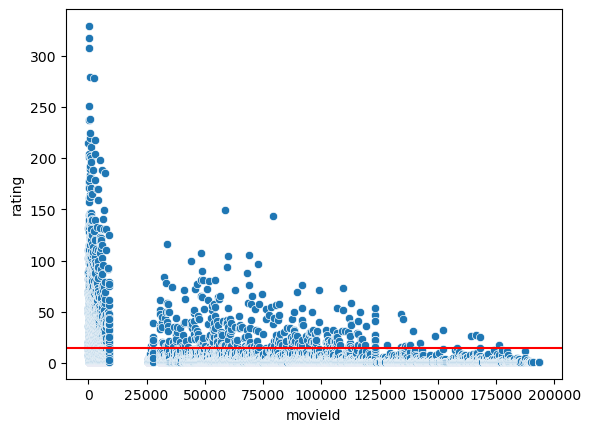

In [16]:
sns.scatterplot(user_rating) 
plt.axhline(15,color="r")

In [17]:
final_dataset=final_dataset.loc[user_rating[user_rating>15].index,:] 

In [18]:
final_dataset.shape

(1572, 610)

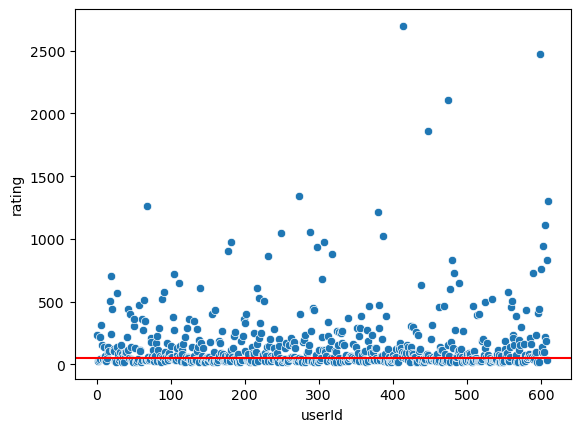

In [19]:
sns.scatterplot(movie_rating) 
plt.axhline(50,color="r")

In [20]:
final_dataset=final_dataset.loc[:,movie_rating[movie_rating>50].index] 

In [21]:
final_dataset.head() 

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [22]:
from scipy.sparse import csr_matrix

In [23]:
csr_data= csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [24]:
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (1570, 236)	5.0
  (1570, 256)	4.0
  (1570, 293)	3.5
  (1570, 321)	5.0
  (1570, 332)	3.0
  (1570, 345)	4.0
  (1570, 357)	5.0
  (1570, 365)	5.0
  (1570, 367)	3.5
  (1570, 377)	5.0
  (1571, 31)	3.0
  (1571, 37)	4.0
  (1571, 41)	3.5
  (1571, 83)	3.5
  (1571, 115)	4.5
  (1571, 155)	2.5
  (1571, 156)	4.5
  (1571, 197)	4.5
  (1571, 210)	4.5
  (1571, 236)	4.0
  (1571, 256)	5.0
  (1571, 345)	5.0
  (1571, 357)	2.5
  (1571, 367)	3.5
  (1571, 369)	4.0


# Model Building

In [26]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(algorithm='brute',metric='euclidean',n_neighbors=20,n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='euclidean', n_jobs=-1,
                 n_neighbors=20)

In [27]:
def movie_recomndation (movie_name):
    movie_list= movies[movies['title'].str.contains(movie_name)]
    movie_id= movie_list.iloc[0]['movieId']
    movie_id= final_dataset[final_dataset['movieId']==movie_id].index[0]
    distance,indexes = knn.kneighbors(csr_data[movie_id],n_neighbors=15)
    rec_movies= sorted(list(zip(indexes.squeeze().tolist(),distance.squeeze().tolist())),key= lambda x:x[1])[:0:-1]
    
    recomdation =[]
    for val in rec_movies:
       movie_pred= final_dataset.iloc[val[0]]['movieId']
       idx= movies[movies['movieId']==movie_pred].index
       recomdation.append({'Title':movies.iloc[idx]['title'].values[0]})
    df=pd.DataFrame(recomdation ,index=range(1,15))
    return df



In [28]:
print("Enter Your Movie Name")
x= input()
movie_recomndation(x)

Enter Your Movie Name


 Toy Story


,Title
1,"Lion King, The (1994)"
2,Star Wars: Episode I - The Phantom Menace (1999)
3,Groundhog Day (1993)
4,"Monsters, Inc. (2001)"
5,Indiana Jones and the Last Crusade (1989)
6,Shrek (2001)
7,Apollo 13 (1995)
8,Independence Day (a.k.a. ID4) (1996)
9,"Bug's Life, A (1998)"
10,Men in Black (a.k.a. MIB) (1997)
